In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Libraries Info

In [3]:
print('Numpy version - ',np.__version__)
print('Pandas version - ',pd.__version__)
print('Matplotlib version - ',matplotlib.__version__)
print('Seaborn version - ',sns.__version__)
! python --version

Numpy version -  1.26.4
Pandas version -  2.2.2
Matplotlib version -  3.8.4
Seaborn version -  0.13.2
Python 3.12.4


## Loading data

In [5]:
loans=pd.read_csv('loan.csv')

## Understanding data

In [7]:
loans.shape

(39717, 111)

In [8]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Fixing Rows and Columns
* Split columns for more data: Split date into month and year
* Delete columns: Delete columns irrelevant to this analysis
* Delete Rows: Delete all outliers, duplicate rows, and null rows

In [11]:
## Summary showing many columns having null values 
  ## Identify all columns who have more null values
((loans.isnull().sum()/len(loans))*100).sort_values()

id                              0.0
earliest_cr_line                0.0
inq_last_6mths                  0.0
open_acc                        0.0
pub_rec                         0.0
                              ...  
avg_cur_bal                   100.0
bc_open_to_buy                100.0
bc_util                       100.0
mo_sin_old_rev_tl_op          100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

### Below colums have all null values and hence can be removed 
 mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il, 
total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy
bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_in,
mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt0,
num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_liit,
total_il_high_credit_limit,

In [13]:
## Few colums are having all null values. These columns are of no use in the analysis. Remove all such columns
loans = loans.dropna(axis = 1, how = 'all')

In [14]:
loans.shape

(39717, 57)

In [15]:
## Significant amount of coulms were dropped. To be precise 54 columns were removed
((loans.isnull().sum()/len(loans))*100).sort_values()

id                             0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
policy_code                    0.000000
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
addr_state                     0.000000
last_pymnt_amnt                0.000000
initial_list_status            0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
total_acc                      0.000000
recoveries                     0.000000
zip_code                       0.000000
purpose                        0.000000
member_id                      0.000000
loan_amnt                      0.000000


In [16]:
# Many colums seems to have same values. Find the column which have same values in all the rows and remove them as the data will not help in analysis
print(loans['collections_12_mths_ex_med'].nunique())
print(loans['policy_code'].nunique())
print(loans['application_type'].nunique())
print(loans['acc_now_delinq'].nunique())
print(loans['delinq_amnt'].nunique())
print(loans['pub_rec_bankruptcies'].nunique())


1
1
1
1
1
3


In [17]:
columns_with_unique_values = []
for column in loans.columns:
    if loans[column].nunique()==1:
        columns_with_unique_values.append(column)
print(columns_with_unique_values)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [18]:
# mths_since_last_delinq,mths_since_last_record,next_pymnt_d has many null values and may not be use full in analysis
columns_with_many_nulls = ['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d']

In [19]:
## This analysis is to identify patterns which indicate if a person is likely to default or not. The data has few more columsns which can be dropped
## title and purpose looks to have similar values and purpose has more relevant business terminology
## loans.id.value_counts(),loans.memeber_id.value_counts(),loans.emp_title.value_counts(),loans.url.value_counts(),loans.title.value_counts()
columns_not_relevant = ['id','member_id', 'emp_title','url','title','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','earliest_cr_line','zip_code']


In [20]:
## The dataset has columns which are data on attributes relating to after loan issuance events/process. These columns will not be help ful identifying 
## patterns if a person is likely to default or not
columns_with_after_loan_issuance_attributes=['recoveries','collection_recovery_fee','out_prncp','out_prncp_inv','recoveries','total_pymnt','total_pymnt_inv',
                        'total_rec_int','total_rec_late_fee','total_rec_prncp']

In [21]:
## Dropping all the columns which are identified to be not much useful in the analysis
loans = loans.drop(columns_with_unique_values, axis = 1)
loans = loans.drop(columns_with_many_nulls, axis = 1)
loans = loans.drop(columns_not_relevant, axis = 1)
loans = loans.drop(columns_with_after_loan_issuance_attributes, axis = 1)

In [22]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [23]:
## Check for duplicate columns 
loans.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [24]:
## Check for duplicate rows and remove 
loans[loans.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies


In [25]:
## This analysis is to identify patterns which indicate if a person is likely to default or not. With Current loan records we cannot determine any
## metrics which help our analysis
loans = loans[loans.loan_status !='Current']
loans.shape

(38577, 25)

In [26]:
## Deriving month and year from date column and drop date column
loans.issue_d = pd.to_datetime(loans.issue_d, format = '%b-%y')
loans['month'] = loans.issue_d.dt.month
loans['year'] = loans.issue_d.dt.year
loans = loans.drop('issue_d', axis = 1)

## Standardizing the data

In [28]:
#int_rate and revol_util are Quantitative variable and must be converted to numeric
#Split the date into month and year which will useful during analaysis and drop the date column
loans.int_rate = pd.to_numeric(loans.int_rate.str.replace('%', ''))
loans.revol_util = pd.to_numeric(loans.revol_util.str.replace('%', ''))

In [29]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,month,year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0,1,3,0,13648,83.7,9,0.0,12,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0,5,3,0,1687,9.4,4,0.0,12,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0,2,2,0,2956,98.5,10,0.0,12,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0,1,10,0,5598,21.0,37,0.0,12,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0,3,9,0,7963,28.3,12,0.0,12,2011


## Handling Missing Values
## Identifying missing values

In [31]:
(loans.isna().sum()/len(loans))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
month                   0.000000
year                    0.000000
dtype: float64

## Imputing missing values

In [33]:
## emp_length,revol_util,pub_rec_bankruptcies have missing values and must be imputed
print(loans[loans.emp_length.isna()].loan_status.value_counts())
print(loans[loans.revol_util.isna()].loan_status.value_counts())
print(loans[loans.pub_rec_bankruptcies.isna()].loan_status.value_counts())

loan_status
Fully Paid     805
Charged Off    228
Name: count, dtype: int64
loan_status
Fully Paid     34
Charged Off    16
Name: count, dtype: int64
loan_status
Fully Paid     579
Charged Off    118
Name: count, dtype: int64


In [34]:
## emp_length is a categorical variable has a very small percentage of null values and it is safe to impute the values with mode of emp_length
loans.emp_length.fillna(loans.emp_length.mode()[0], inplace = True)
loans.emp_length.isna().sum()

0

In [35]:
## revol_util is a quantitative variable and has a very small percentage of null values and it is safe to impute the values with mean of revol_util
loans.revol_util.fillna(loans.revol_util.mean(), inplace = True)
loans.revol_util.isna().sum()

0

In [36]:
## pub_rec_bankruptcies is a categorical variable  has a very small percentage of null values and it is safe to impute the values with mode of pub_rec_bankruptcies
loans.pub_rec_bankruptcies.fillna(loans.pub_rec_bankruptcies.mode()[0], inplace = True)
loans.pub_rec_bankruptcies.isna().sum()

0

In [37]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

## Outlier Treatment
 Identify Ouliers and remove if there are any.

<Axes: ylabel='annual_inc'>

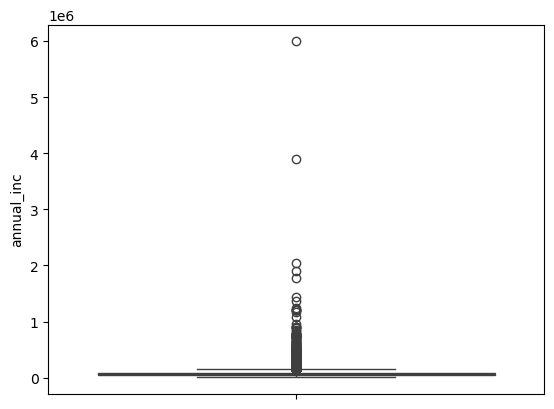

In [39]:
sns.boxplot(loans.annual_inc)

In [40]:
## annual income has outliers and for removal outliers tried removing using quantile values 0.99-0.95. There are still some outlier in the loan amount 
## For this analysis we have decided to set the quantile at 0.95 and check the outliers for other quantitative variables
loans = loans[loans.annual_inc <= loans.annual_inc.quantile(0.95)]

<Axes: ylabel='annual_inc'>

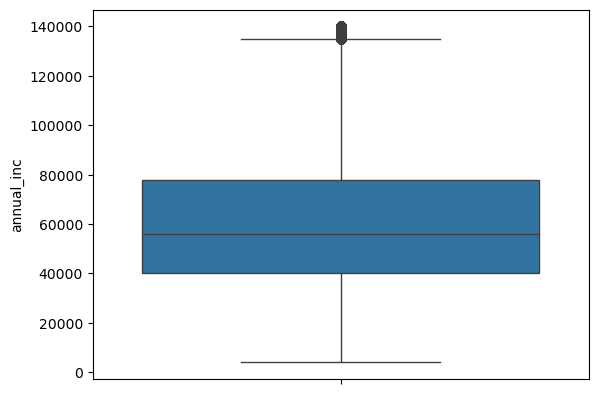

In [41]:
sns.boxplot(loans.annual_inc)

In [42]:
loans.shape

(36654, 26)

<Axes: ylabel='loan_amnt'>

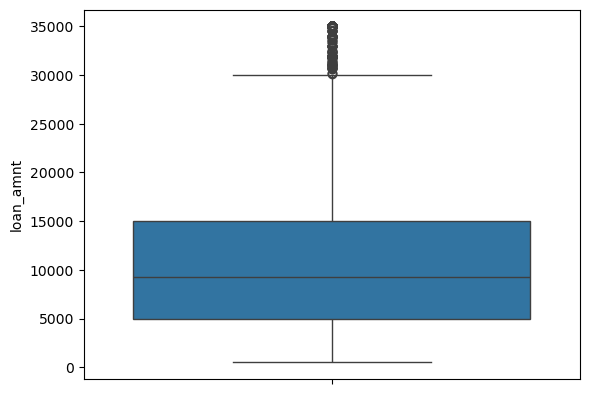

In [43]:
sns.boxplot(loans.loan_amnt)

In [44]:
## Loan amount has outliers and for removal of outliers tried removing using quantile values 0.99-0.97. At 0.97 there are no ouliers 
loans = loans[loans.loan_amnt <= loans.loan_amnt.quantile(0.97)]

In [45]:
loans.shape

(35557, 26)

<Axes: >

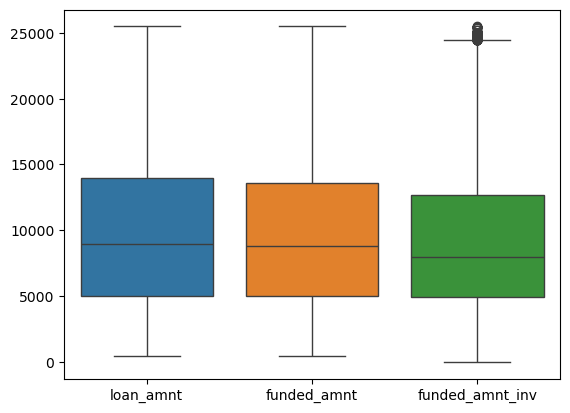

In [46]:
sns.boxplot([loans.loan_amnt,loans.funded_amnt,loans.funded_amnt_inv])

<Axes: ylabel='revol_util'>

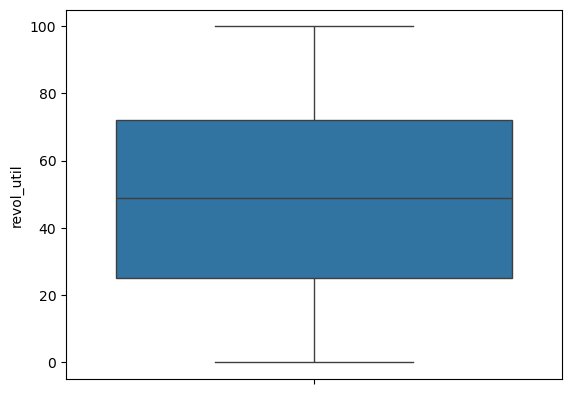

In [47]:
sns.boxplot(loans.revol_util)

<Axes: ylabel='dti'>

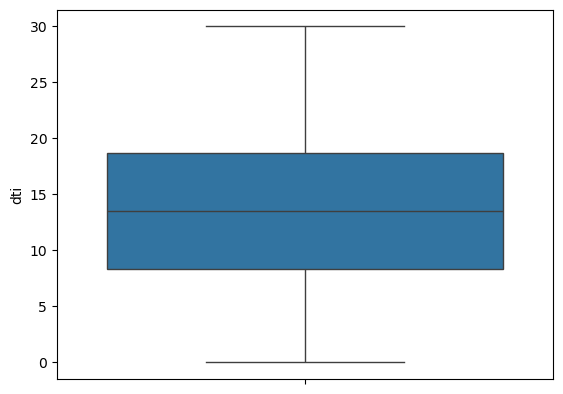

In [48]:
sns.boxplot(loans.dti)

## Target Variable - loan_status 
Problem statement is to identify patterns for defaulters. Loan Status is the variable which indicates if an applicant is good or bad customer. Attributes of bad customer can be a detemential in our analysis. Hence we are going to analyse the data using loan_status as target variable

In [50]:
loans.loan_status.value_counts()

loan_status
Fully Paid     30410
Charged Off     5147
Name: count, dtype: int64

[]

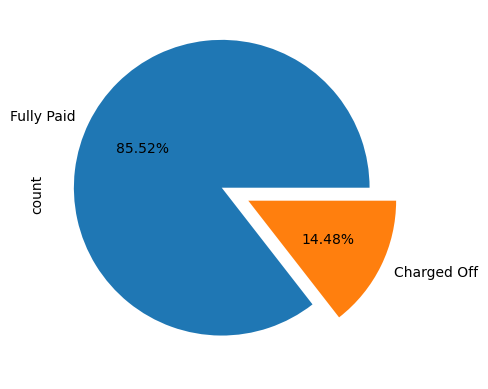

In [51]:
loans.loan_status.value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.2f%%')
plt.plot()

## Univariate Analysis
* Unordered Categorical Variables
* Ordered Categorical Variables
* Quantitative Variables 

### Unordered Categorical Variables
1. purpose - A category provided by the borrower for the loan request. 
2. home_ownership - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
3. addr_state - The state provided by the borrower in the loan application

In [54]:
## Re usable function which plot count values of a variable. We are using loan_status as hue to differentiate the counts of good and bad loans
def countPlotWithHue(data,x,xlabel,title,figuresize=(6,6),rotation=0):
    plt.figure(figsize=figuresize)
    sns.countplot(data=loans,x=x,hue='loan_status')
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()

In [55]:
## Re usable function which plot count values of a variable as a subplot. We are using loan_status as hue to differentiate the counts of good and bad loans
def countPlotWithHueAsSubPlot(data,x,xlabel,title,ax):
    sns.countplot(data=loans,x=x,hue='loan_status',ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

#### Univariate Analysis of Unordered Categorical Variables

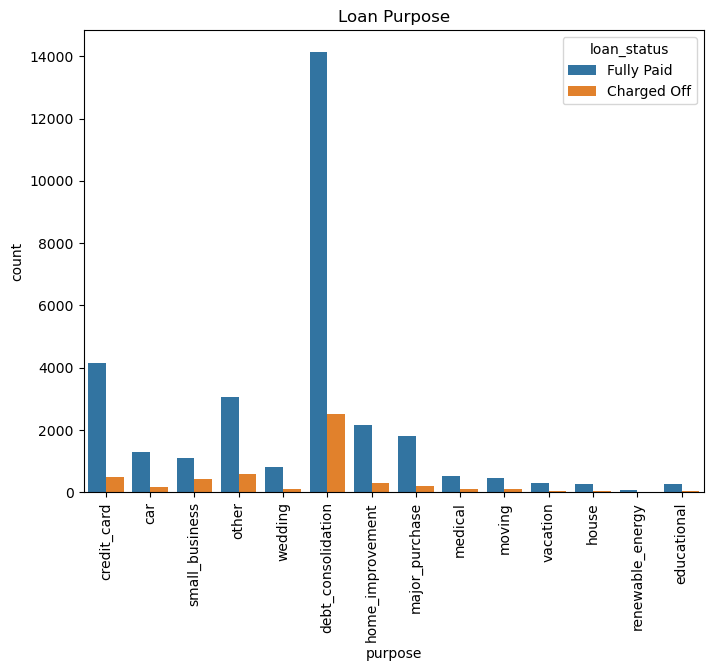

In [57]:
countPlotWithHue(loans,'purpose','Purpose','Loan Purpose',(8,6),90)

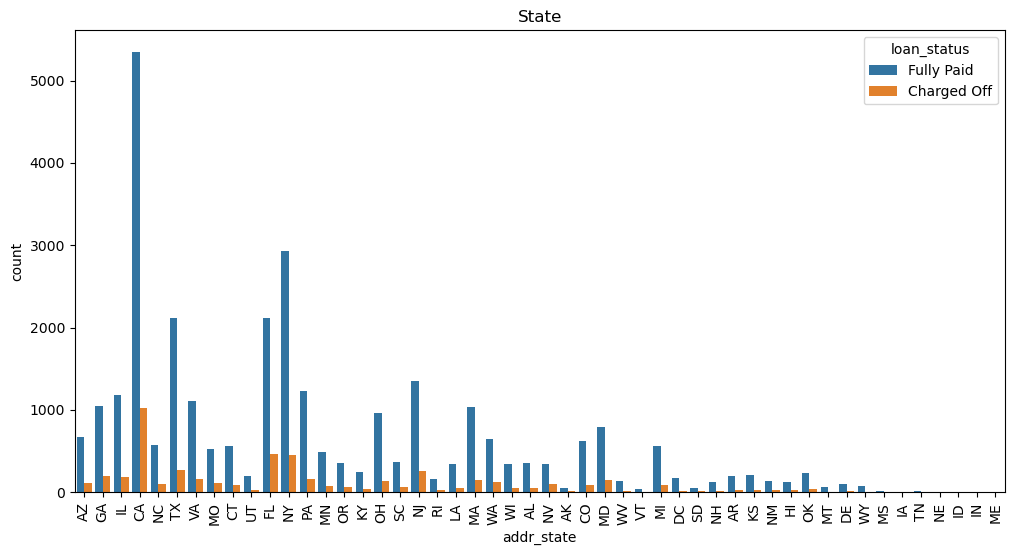

In [58]:
countPlotWithHue(loans,'addr_state','State','State',(12,6),90)

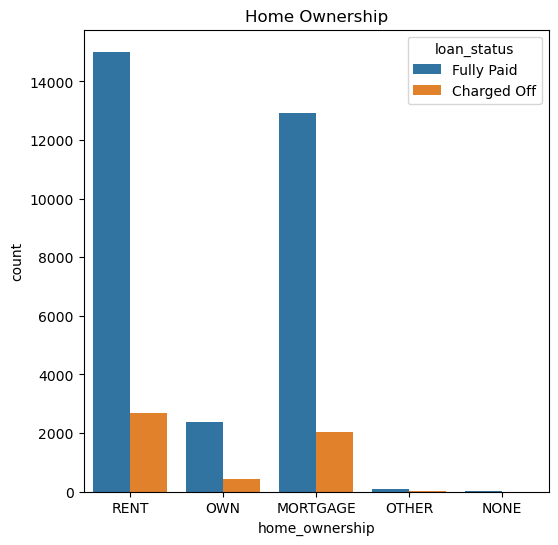

In [59]:
countPlotWithHue(loans,'home_ownership','Home Ownership','Home Ownership')

### Ordered Categorical Variables
1. term - The number of payments on the loan. Values are in months and can be either 36 or 60.
2. grade - LC assigned loan grade
3. sub_grade - LC assigned loan subgrade
4. emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
5. verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified
6. loan_status - Current status of the loan
9. delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
10. inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
11. open_acc - The number of open credit lines in the borrower's credit file.
12. pub_rec - Number of derogatory public records
13. total_acc - The total number of credit lines currently in the borrower's credit file
14. pub_rec_bankruptcies - Number of public record bankruptcies
15. month - Loan issued month
16. year - Loan issued year

#### Univariate Analysis of Ordered Categorical Variables

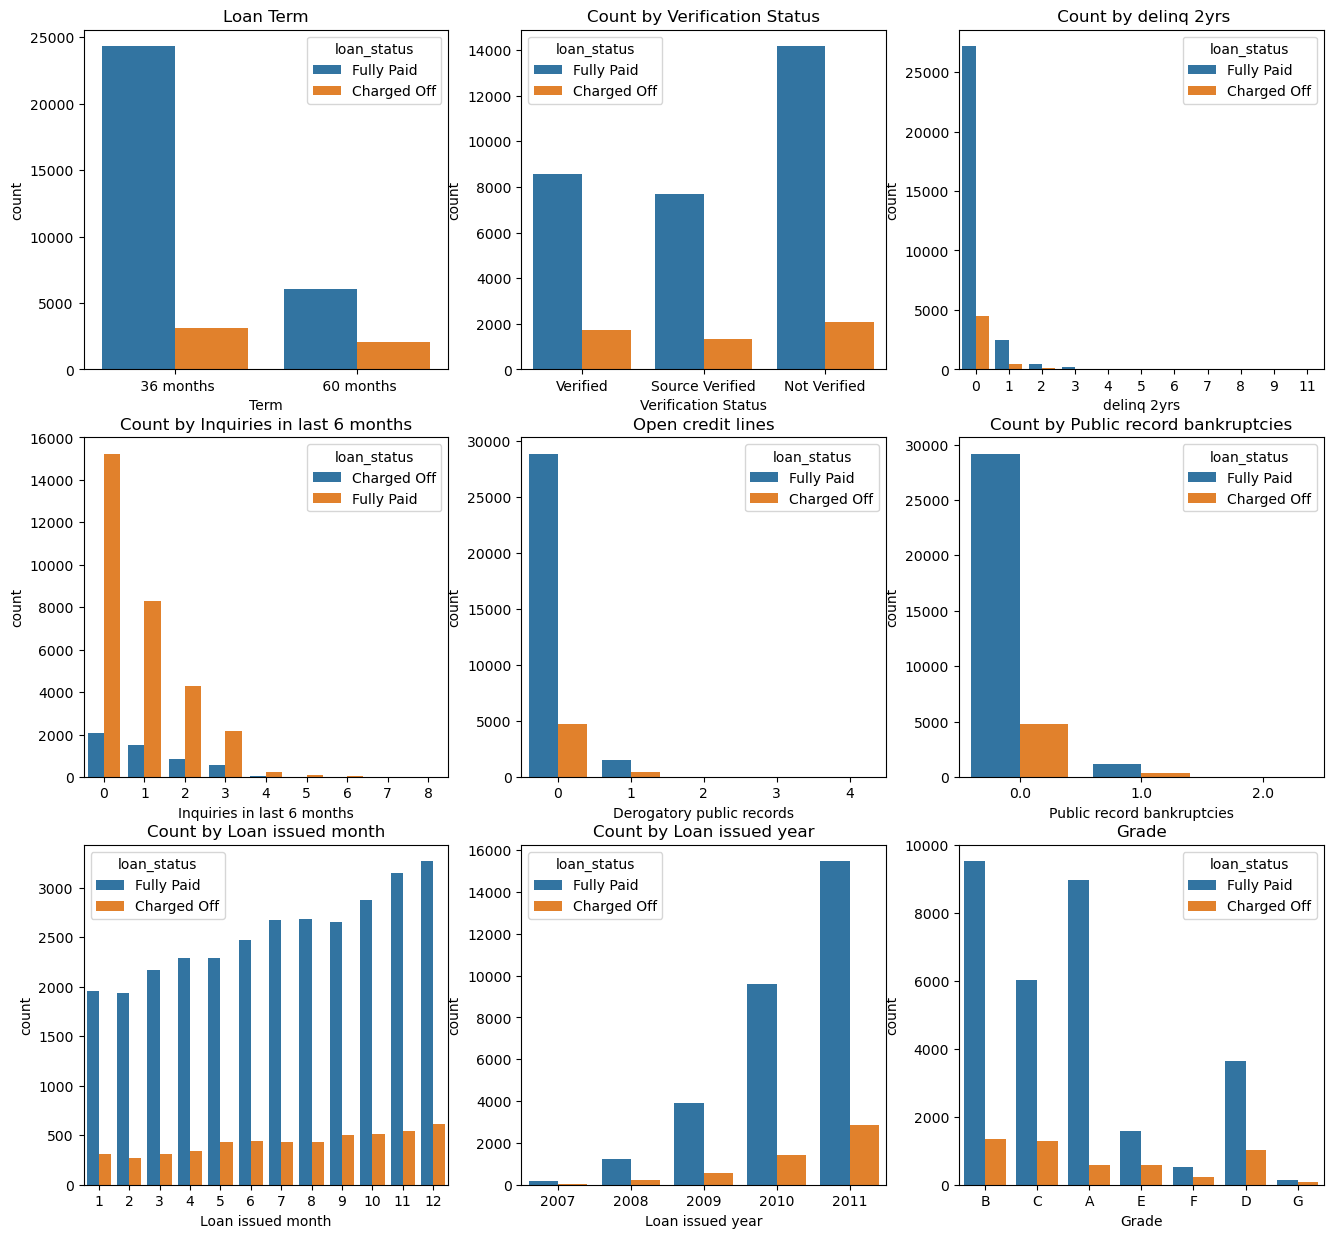

In [62]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(16,15))
countPlotWithHueAsSubPlot(loans,'term','Term','Loan Term',ax[0][0])
countPlotWithHueAsSubPlot(loans,'verification_status','Verification Status','Count by Verification Status',ax[0][1])
countPlotWithHueAsSubPlot(loans,'delinq_2yrs','delinq 2yrs',' Count by delinq 2yrs',ax[0][2])
countPlotWithHueAsSubPlot(loans,'inq_last_6mths','Inquiries in last 6 months','Count by Inquiries in last 6 months',ax[1][0]) 
countPlotWithHueAsSubPlot(loans,'pub_rec','Derogatory public records','Open credit lines',ax[1][1])
countPlotWithHueAsSubPlot(loans,'pub_rec_bankruptcies','Public record bankruptcies','Count by Public record bankruptcies',ax[1][2])
countPlotWithHueAsSubPlot(loans,'month','Loan issued month','Count by Loan issued month',ax[2][0])
countPlotWithHueAsSubPlot(loans,'year','Loan issued year','Count by Loan issued year',ax[2][1])
countPlotWithHueAsSubPlot(loans,'grade','Grade','Grade',ax[2][2])

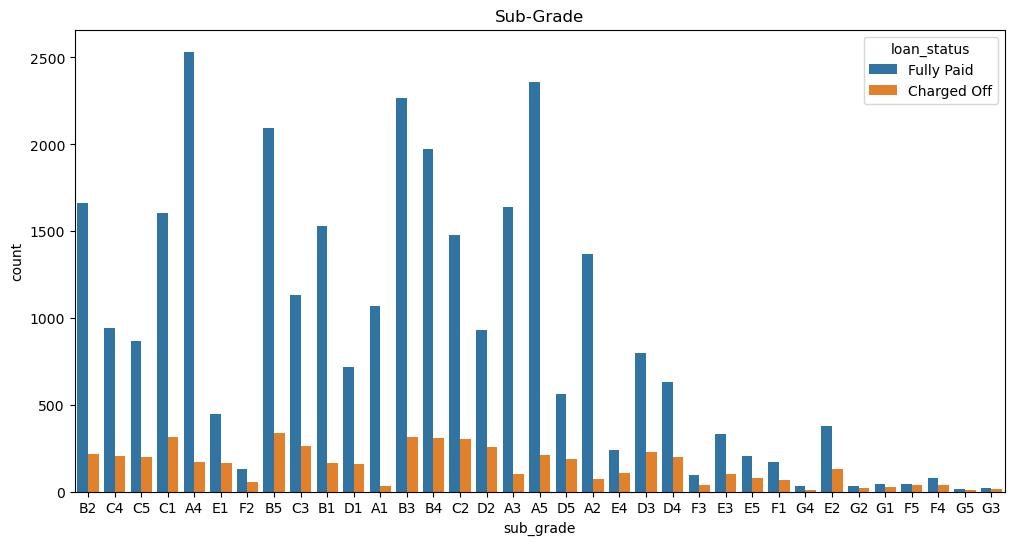

In [63]:
countPlotWithHue(loans,'sub_grade','Sub-Grade','Sub-Grade',(12,6))

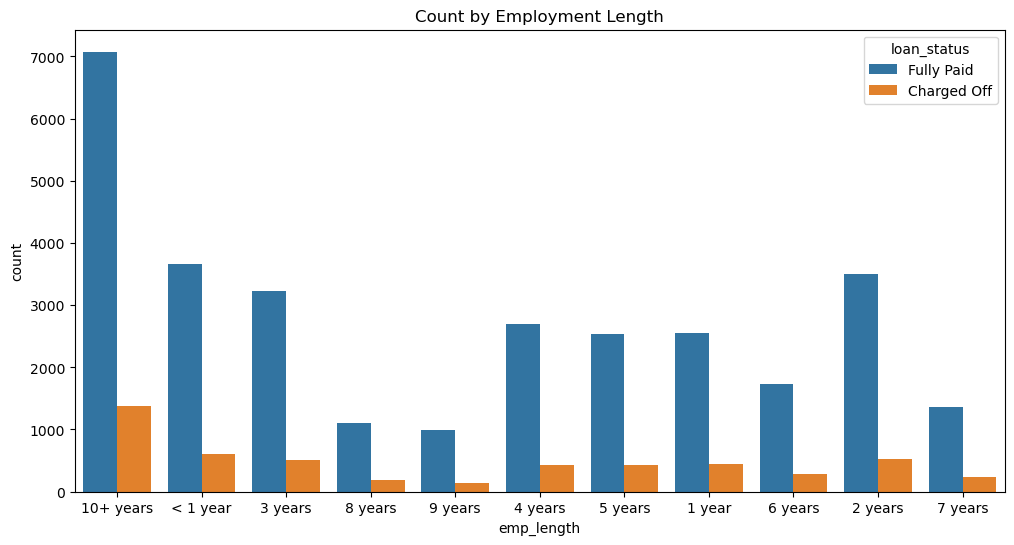

In [64]:
countPlotWithHue(loans,'emp_length','Employment Length','Count by Employment Length',(12,6))

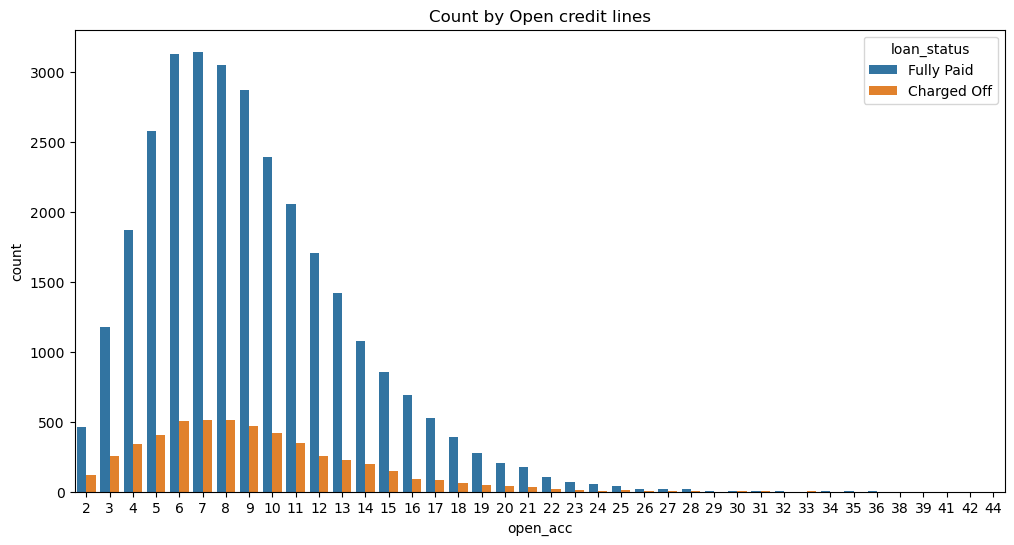

In [65]:
countPlotWithHue(loans,'open_acc','Open credit lines','Count by Open credit lines',(12,6))

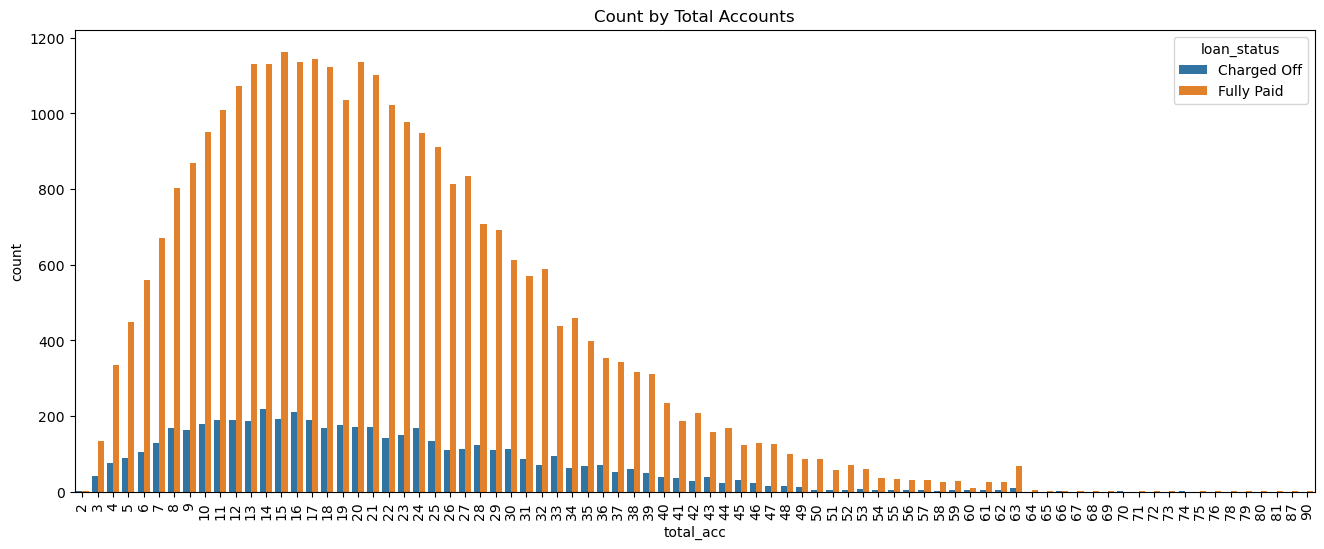

In [66]:
countPlotWithHue(loans,'total_acc','Total Accounts','Count by Total Accounts',(16,6),90)

## Observation from Univariate analysis of Categorical Variable
1. Majority of Loans are taken for debt consolidation
2. Loans issued are decremental from grades A-G
3. Loans issued are decremental from experiece 0 to 9 but 10+ has a spike probably because all other experiences fall under this category. Going by this trend we can assume more the experience less the possibility of taking loan
4. Majority of loans are taken who doesnt own a home
5. Approximately 14.48% of the overall loans are Charged Off
6. Loans issued are almost doubled every year

### Quantitative Variables
1. loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. funded_amnt - The total amount committed to that loan at that point in time.
3. funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
4. int_rate - Interest Rate on the loan
5. installment - The monthly payment owed by the borrower if the loan originates.
6. annual_inc - The self-reported annual income provided by the borrower during registration.
7. dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
8. revol_bal - Total credit revolving balance (A total credit revolving balance is the amount of credit card spending that is unpaid at the end of a billing cycle. It is the balance that is carried over from one month to the next when the minimum payment is made instead of paying off the full balance)
9. revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.(Revolving line utilization rate, also known as credit utilization ratio, is the percentage of your total available credit that you're using for revolving credit. It's calculated by dividing your total balance by your total creit limit.)
   ]

<Axes: >

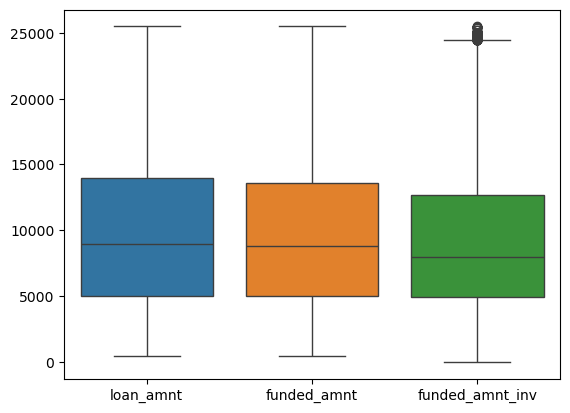

In [69]:
sns.boxplot([loans.loan_amnt,loans.funded_amnt,loans.funded_amnt_inv])

In [70]:
## from box plot above the values of loan_amnt,funded_amnt,funded_amnt_inv looks correlated. lets figure out if the assumption is true
loans[['annual_inc','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','revol_bal','revol_util']].describe()

,annual_inc,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,revol_bal,revol_util
count,35557.000000,35557.000000,35557.000000,35557.000000,35557.000000,35557.000000,35557.000000,35557.000000,35557.000000
mean,59952.083697,10039.167393,9829.958236,9304.068169,11.774088,296.435340,13.407449,11992.345867,48.564236
std,27361.046840,6089.477523,5894.527306,5838.299843,3.595128,178.540691,6.662439,13475.358340,28.284651
min,4000.000000,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,0.000000,0.000000
25%,40000.000000,5000.000000,5000.000000,4939.150902,8.900000,161.130000,8.300000,3475.000000,25.200000
50%,55000.000000,9000.000000,8800.000000,8000.000000,11.710000,262.430000,13.520000,8292.000000,48.800000
75%,75000.000000,14000.000000,13600.000000,12725.000000,14.260000,393.500000,18.680000,15709.000000,72.000000
max,140004.000000,25475.000000,25475.000000,25475.000000,24.400000,945.350000,29.990000,149000.000000,99.900000


In [71]:
quantitative_var_corr= loans[['annual_inc','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','revol_bal','revol_util']].corr()

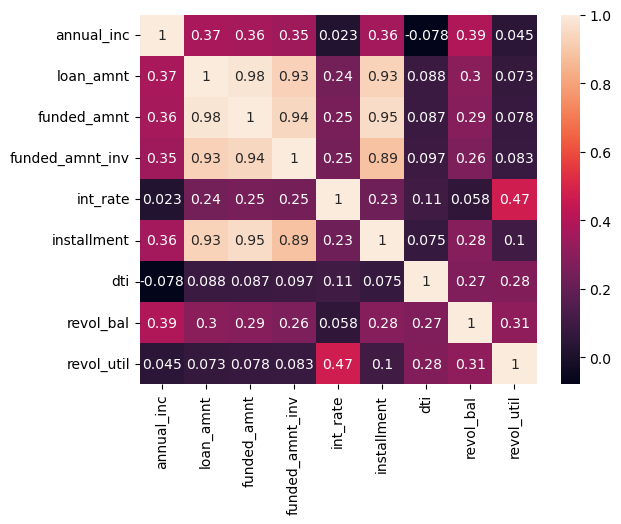

In [72]:
sns.heatmap(quantitative_var_corr,annot=True)
plt.show()

In [73]:
## loan_amnt,funded_amnt,funded_amnt_inv,installment are higly corrleated. We can use any one of them for further analysis.Drop all leaving one.
columns_corrleated = ['funded_amnt','funded_amnt_inv','installment']
loans = loans.drop(columns_corrleated, axis = 1)

In [74]:
## Reusable funcion which create as hisgram as a sub plot for a given variable
def histogramPlot(data,x,xlabel,title,ax):
    sns.histplot(data=data, x=x, hue='loan_status', multiple='stack',kde=True,ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

#### Univariate Analysis of Quantitative Variables

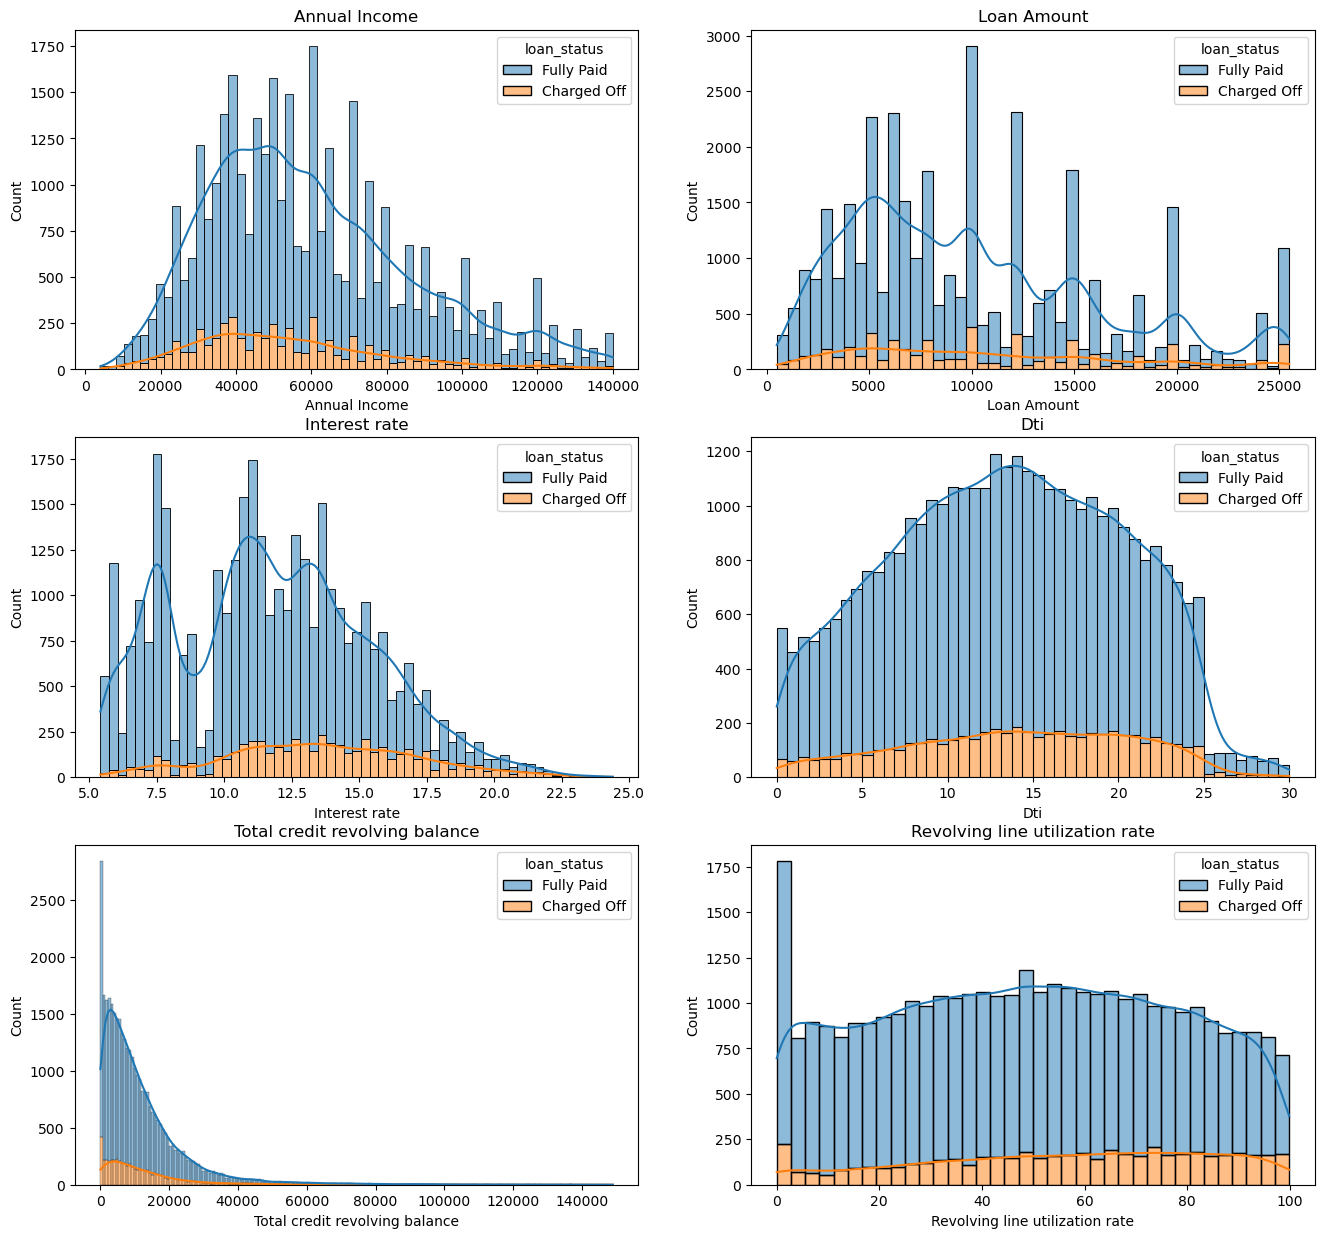

In [76]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(16,15))
histogramPlot(loans,'annual_inc','Annual Income','Annual Income',ax[0][0])
histogramPlot(loans,'loan_amnt','Loan Amount','Loan Amount',ax[0][1])
histogramPlot(loans,'int_rate','Interest rate','Interest rate',ax[1][0])
histogramPlot(loans,'dti','Dti','Dti',ax[1][1])
histogramPlot(loans,'revol_bal','Total credit revolving balance','Total credit revolving balance',ax[2][0])
histogramPlot(loans,'revol_util','Revolving line utilization rate','Revolving line utilization rate',ax[2][1])

## Observation from Univariate analysis of Quantiative Variable
1. Majority of Loans applicants has annual income between 30k and 80k
2. Mojority of Loans issued are for value less than 15k 
3. Interest rate of majority of loans is between 7.5 to 15

In [78]:
loans['annual_inc_bin'] = pd.cut(loans.annual_inc, [0,30000,60000,90000,120000,150000], labels=['0-30000','30000-60000','60000-90000','90000-120000','120000-150000'])
loans['loan_amnt_bin'] = pd.cut(loans.loan_amnt, [0,6000,12000,18000,24000,30000], labels=['0-6000','6000-12000','12000-18000','18000-24000','24000-30000'])
loans['int_rate_bin'] = pd.cut(loans.int_rate, [5,10,15,20,25], labels=['5-10','10-15','15-20','20-25'])
loans['dti_bin'] = pd.cut(loans.dti, [0,6,12,18,24,30], labels=['0-6','6-12','12-18','18-24','24-30'])
loans['revol_bal_bin'] = pd.cut(loans.revol_bal, [0,30000,60000,90000,120000,150000], labels=['0-30000','30000-60000','60000-90000','90000-120000','120000-150000'])
loans['revol_util_bin'] = pd.cut(loans.revol_util, [0,20,40,60,80,100], labels=['0-20','20-40','40-60','60-80','80-100'])

## Bivariate Analysis
#### Our goal is to identify driving factors for loan defaulting. The key value for this analysis in loan status 'Charge Off'. Counts of loan status for each variable gives us the numbers which will not be easy to disect as the numbers are big.  It will be more easier to analyse the values if analysis is done on the ratio of 'Charge Off' with total loans. This will give us numbers which will be more easier to disect 

In [80]:
## Re-usable function which creates  a bar plot as a sub plot with charged off ratio
def barplotWithPercentMetricsAsSubPlot(data,column,title,xlabel,ax):      
    group_data = data.groupby([column, 'loan_status']).loan_status.count().unstack()
    group_data['percent'] = (group_data['Charged Off'] /(group_data['Charged Off']+group_data['Fully Paid']))*100    
    sns.barplot(x=column, y='percent', data=group_data,ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)    
    ax.set_ylabel('Charged Off Percent')

In [81]:
## Re-usable function which creates  a bar plot with charged off ratio
def barplotWithPercentMetrics(data,column,title,xlabel,figuresize=(6,5),rotation=0):
    plt.figure(figsize=figuresize)
    group_data = data.groupby([column, 'loan_status']).loan_status.count().unstack()
    group_data['percent'] = (group_data['Charged Off'] /(group_data['Charged Off']+group_data['Fully Paid']))*100    
    sns.barplot(x=column, y='percent', data=group_data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=rotation)    
    plt.ylabel('Charged Off Percent')

In [82]:
## Re-usable function which creates  a bar plot with 2 variables
def barplotWithXandY(data,x,y,title,xlabel,ylabel,figuresize=(6,5),rotation=0):
    plt.figure(figsize=figuresize)
    sns.barplot(data=data,x=x, y=y,hue='loan_status',estimator=np.mean)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)

In [83]:
## Re-usable function which creates  a scatter plot with 2 variables with loan status as hue
def scatterPlotWithHue(data,x,y,title,xlabel,ylabel,figuresize=(6,5),rotation=0):
    plt.figure(figsize=figuresize)
    sns.scatterplot(data=data,x=x, y=y,hue='loan_status')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)  
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [84]:
## Re-usable function which creates  a box plot with 2 variables with loan status as hue
def boxplotWithHue(data,x,y,title,xlabel,ylabel,figuresize=(6,5),rotation=0):
    plt.figure(figsize=figuresize)
    sns.boxplot(data=data,x=x, y=y,hue='loan_status')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [85]:
## Re-usable function which creates  a box plot as sub plot with 2 variables with loan status as hue
def boxplotWithHueAsSubplot(data,x,y,title,xlabel,ylabel,ax):
    sns.boxplot(data=data,x=x, y=y,hue='loan_status',ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)    
    ax.set_ylabel(ylabel)

## Bivariate analysis on continuous variables

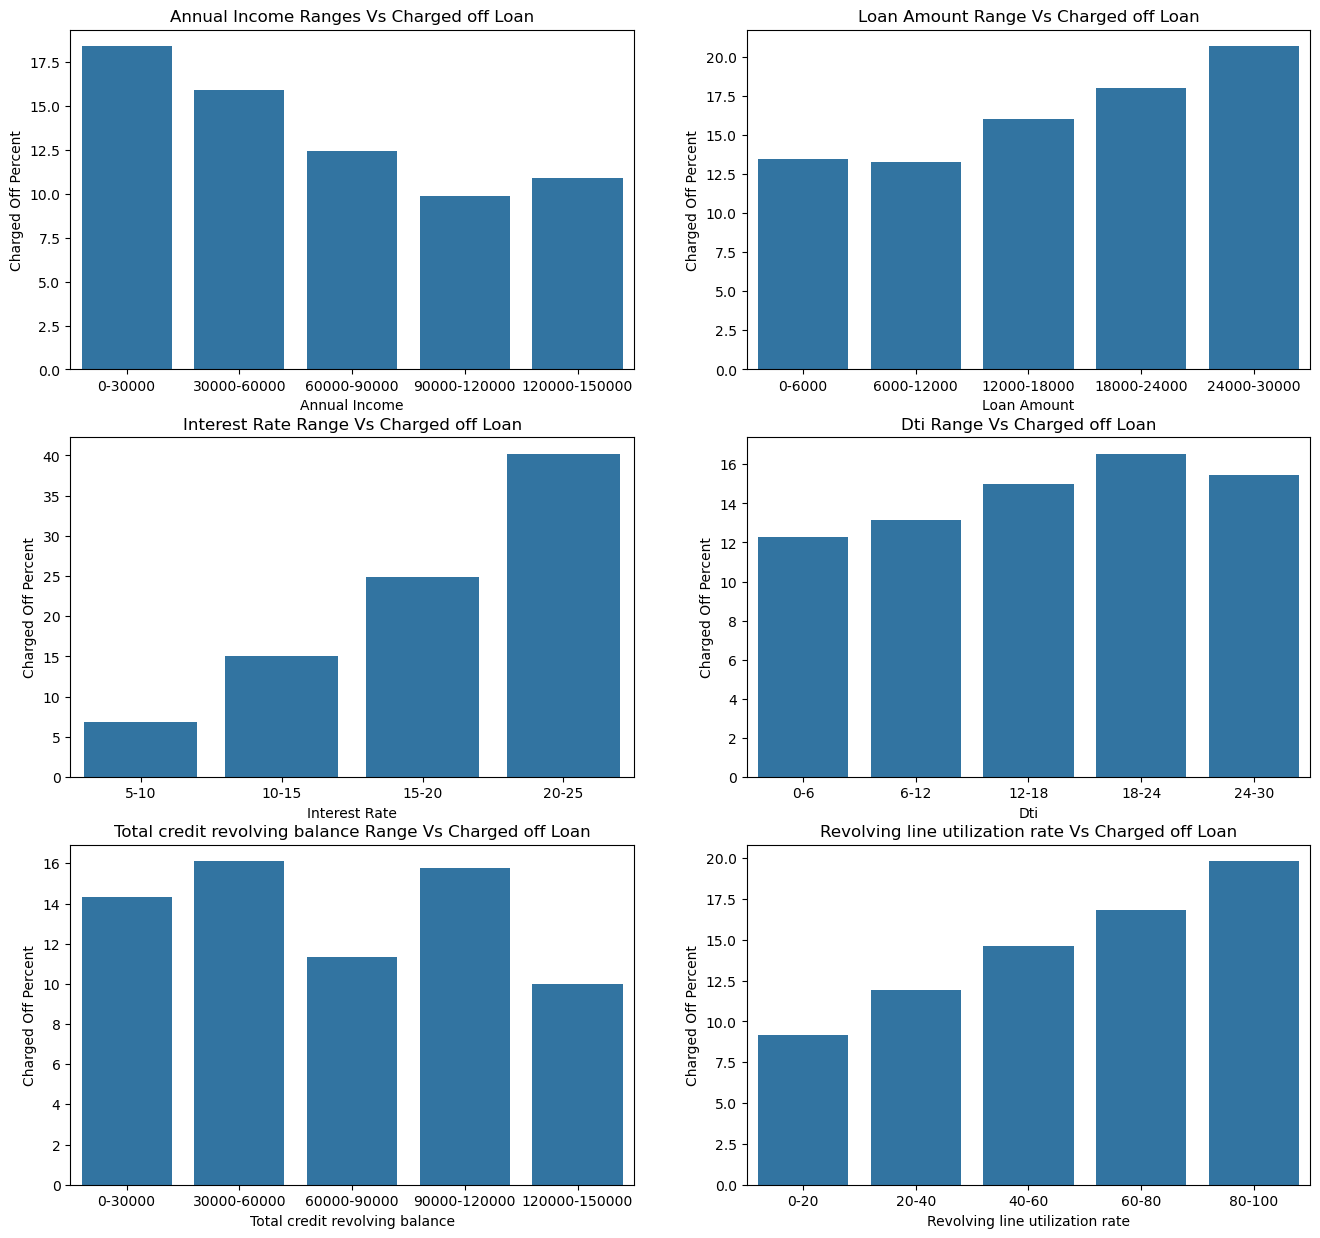

In [87]:
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(16,15))
barplotWithPercentMetricsAsSubPlot(loans,'annual_inc_bin','Annual Income Ranges Vs Charged off Loan','Annual Income',ax[0][0])
barplotWithPercentMetricsAsSubPlot(loans,'loan_amnt_bin','Loan Amount Range Vs Charged off Loan','Loan Amount',ax[0][1])
barplotWithPercentMetricsAsSubPlot(loans,'int_rate_bin','Interest Rate Range Vs Charged off Loan','Interest Rate',ax[1][0])
barplotWithPercentMetricsAsSubPlot(loans,'dti_bin','Dti Range Vs Charged off Loan','Dti',ax[1][1])
barplotWithPercentMetricsAsSubPlot(loans,'revol_bal_bin','Total credit revolving balance Range Vs Charged off Loan','Total credit revolving balance',ax[2][0])
barplotWithPercentMetricsAsSubPlot(loans,'revol_util_bin','Revolving line utilization rate Vs Charged off Loan','Revolving line utilization rate',ax[2][1])

## Observations
* Lower the annual income the percentage of charged off loan are higher
* Higher the loan amount/interest rate/Revolving line utilization the percentage of charged off loan are higher
* Dti and Total credit revolving balance doesnt seem to be a considerable factor in loan defaulting

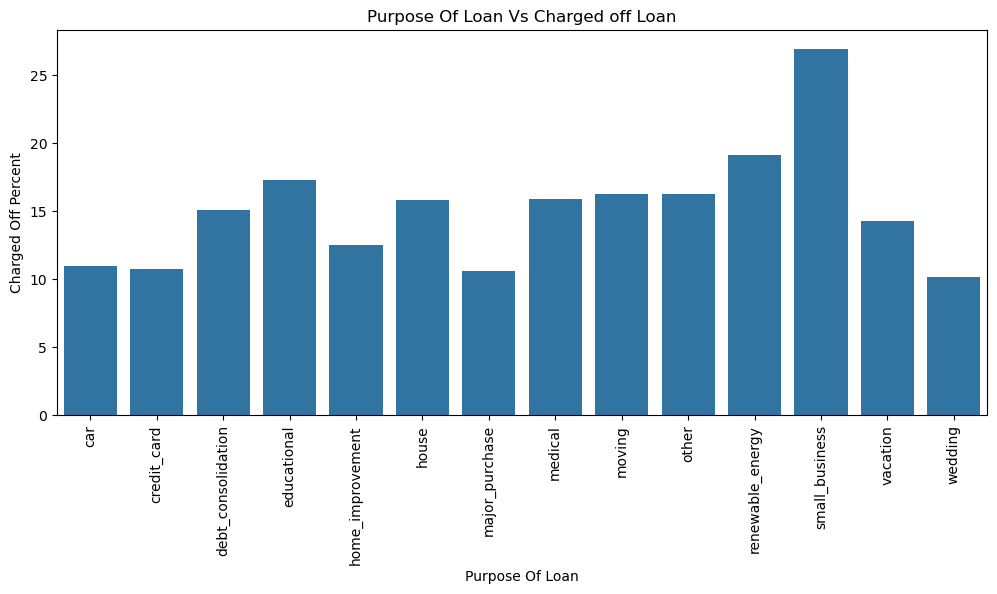

In [89]:
barplotWithPercentMetrics(loans,'purpose','Purpose Of Loan Vs Charged off Loan','Purpose Of Loan',(12,5),90)

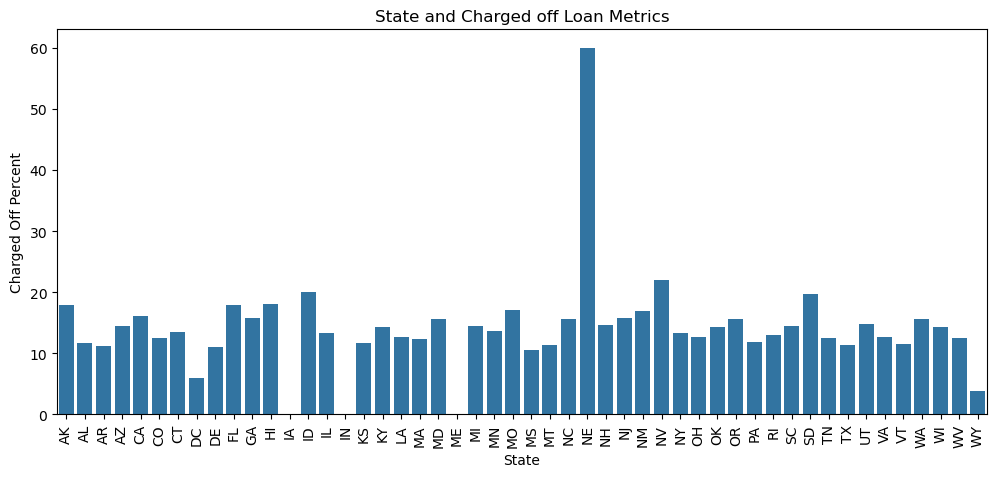

In [90]:
barplotWithPercentMetrics(loans,'addr_state','State and Charged off Loan Metrics','State',(12,5),90)

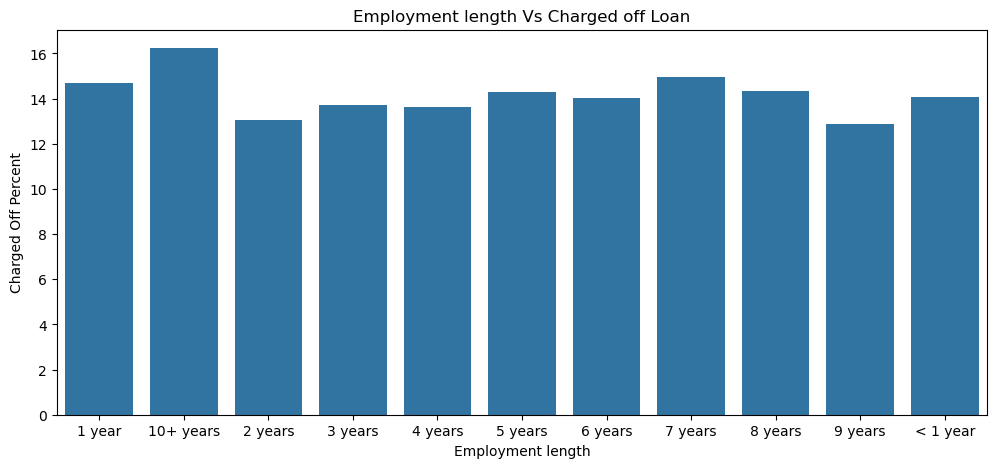

In [91]:
barplotWithPercentMetrics(loans,'emp_length','Employment length Vs Charged off Loan','Employment length',(12,5))

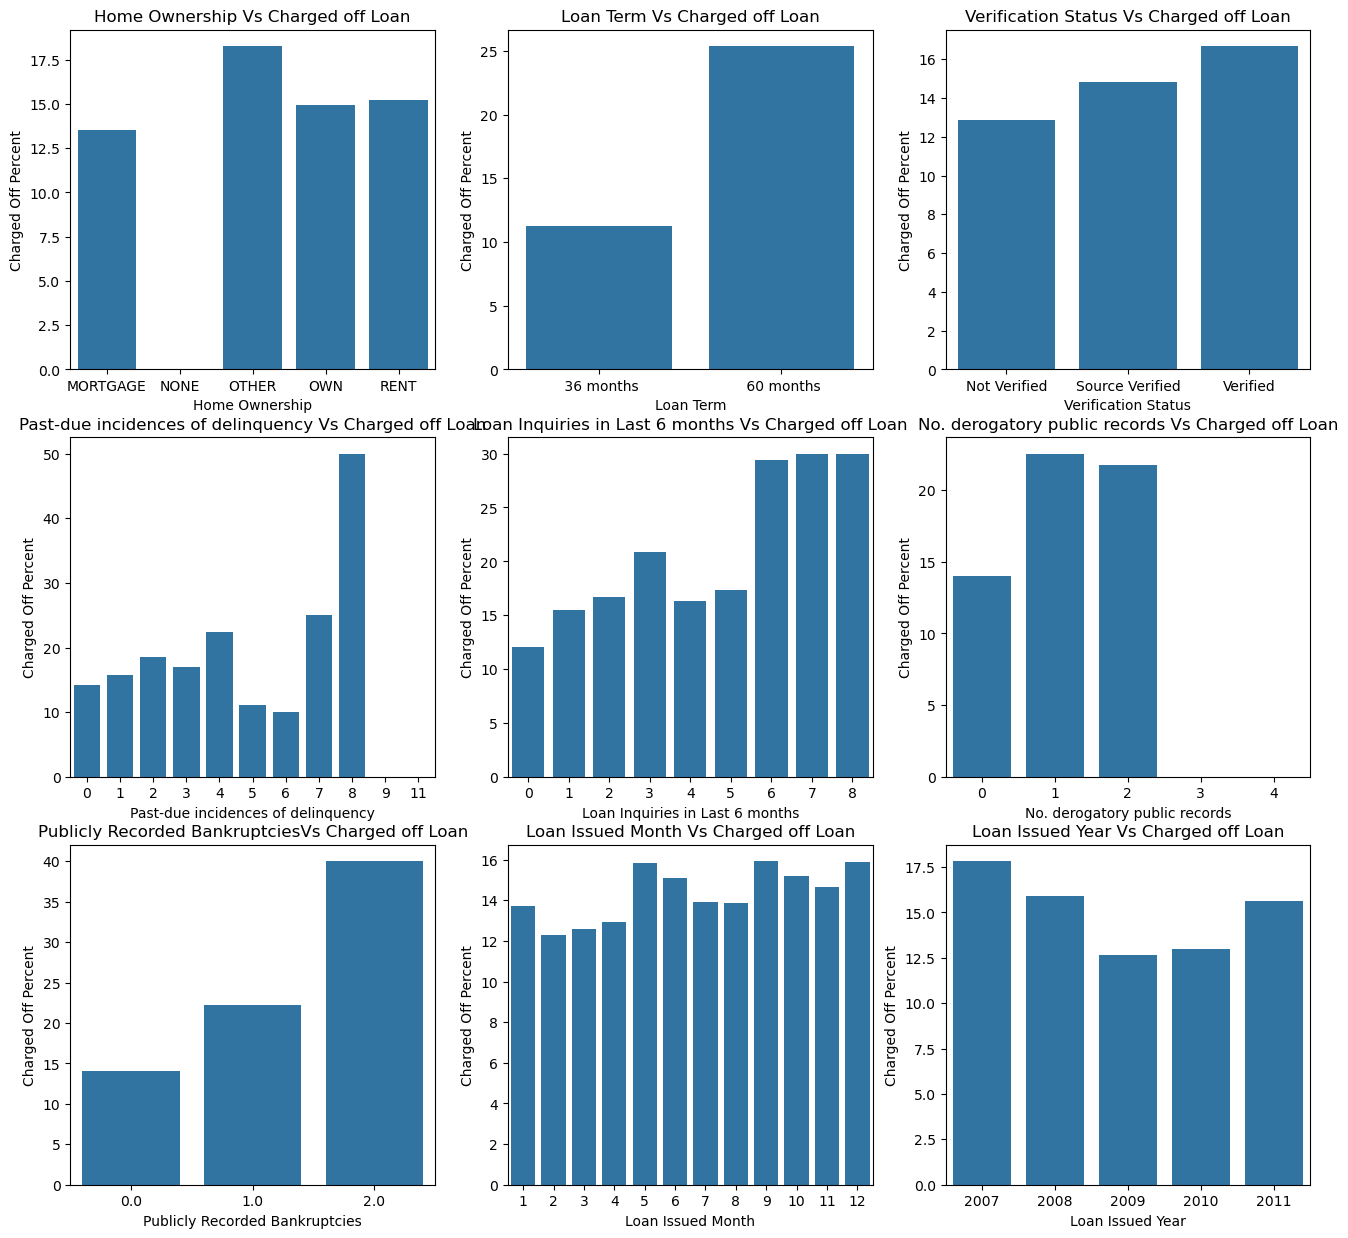

In [92]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(16,15))
barplotWithPercentMetricsAsSubPlot(loans,'home_ownership','Home Ownership Vs Charged off Loan','Home Ownership',ax[0][0])
barplotWithPercentMetricsAsSubPlot(loans,'term','Loan Term Vs Charged off Loan','Loan Term',ax[0][1])
barplotWithPercentMetricsAsSubPlot(loans,'verification_status','Verification Status Vs Charged off Loan','Verification Status',ax[0][2])
barplotWithPercentMetricsAsSubPlot(loans,'delinq_2yrs','Past-due incidences of delinquency Vs Charged off Loan','Past-due incidences of delinquency',ax[1][0])
barplotWithPercentMetricsAsSubPlot(loans,'inq_last_6mths','Loan Inquiries in Last 6 months Vs Charged off Loan','Loan Inquiries in Last 6 months',ax[1][1])
barplotWithPercentMetricsAsSubPlot(loans,'pub_rec','No. derogatory public records Vs Charged off Loan','No. derogatory public records',ax[1][2])
barplotWithPercentMetricsAsSubPlot(loans,'pub_rec_bankruptcies','Publicly Recorded BankruptciesVs Charged off Loan','Publicly Recorded Bankruptcies',ax[2][0])
barplotWithPercentMetricsAsSubPlot(loans,'month','Loan Issued Month Vs Charged off Loan','Loan Issued Month',ax[2][1])
barplotWithPercentMetricsAsSubPlot(loans,'year','Loan Issued Year Vs Charged off Loan','Loan Issued Year',ax[2][2])

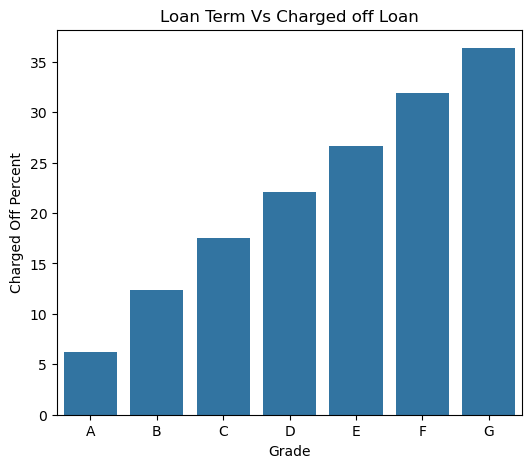

In [93]:
barplotWithPercentMetrics(loans,'grade','Loan Term Vs Charged off Loan','Grade')

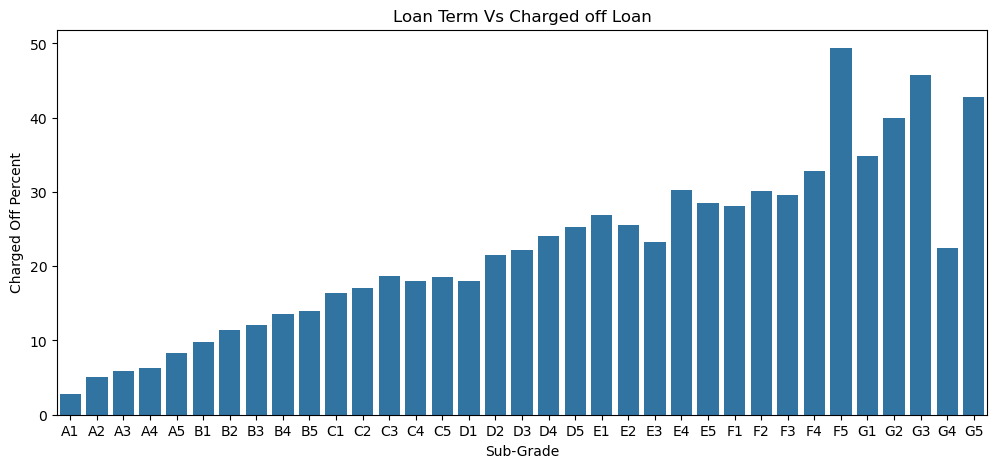

In [94]:
barplotWithPercentMetrics(loans,'sub_grade','Loan Term Vs Charged off Loan','Sub-Grade',(12,5))

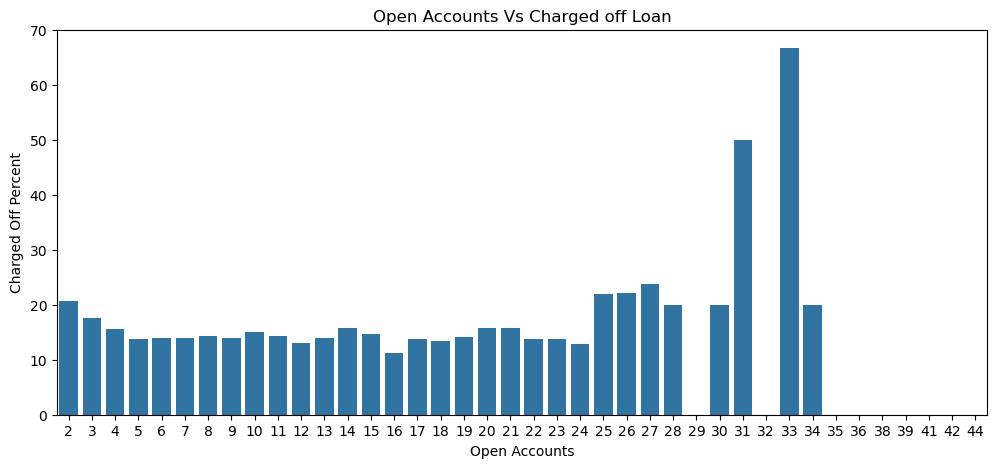

In [95]:
barplotWithPercentMetrics(loans,'open_acc','Open Accounts Vs Charged off Loan','Open Accounts',(12,5))

### Observations 
* More the number of inquiries in last 6month, derogatory public records , and public recorded Bankruptcies the percentage of charged off loans are higher
* Loans taken for small business more percentage of charged off loans
* Higher the grades,subgrades, loan term  higher the percentage of charged off loans
* Home ownership other has more percentage of charged off loans
* Loan term with 60 months have more number of charged off loans
* State/Employment length/number of open accounts doesnt seem be a considerable factor in loan defaulting

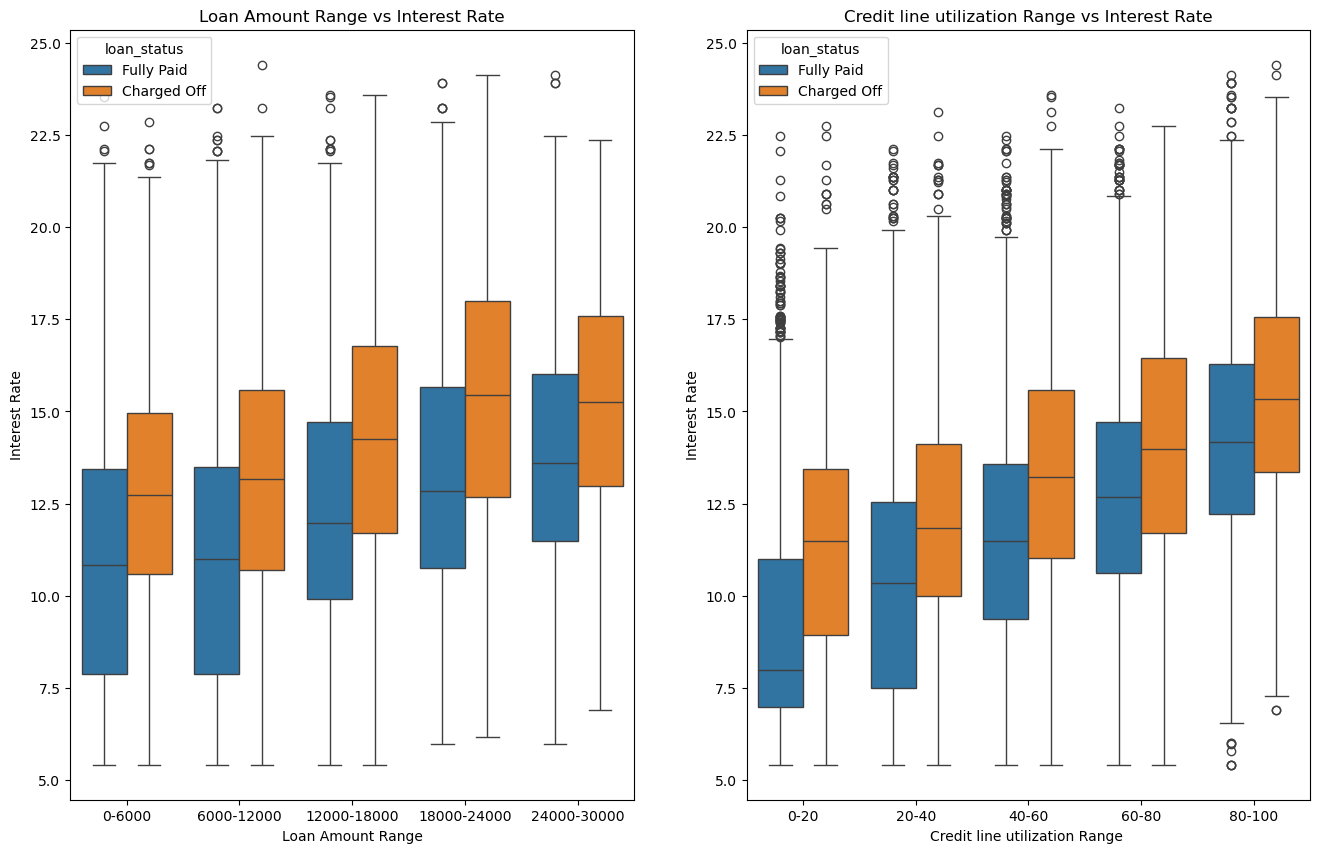

In [97]:
fig, ax = plt.subplots(ncols=2,figsize=(16,10))
boxplotWithHueAsSubplot(loans,'loan_amnt_bin','int_rate','Loan Amount Range vs Interest Rate' ,'Loan Amount Range','Interest Rate',ax[0])
boxplotWithHueAsSubplot(loans,'revol_util_bin','int_rate','Credit line utilization Range vs Interest Rate' ,'Credit line utilization Range ','Interest Rate',ax[1])

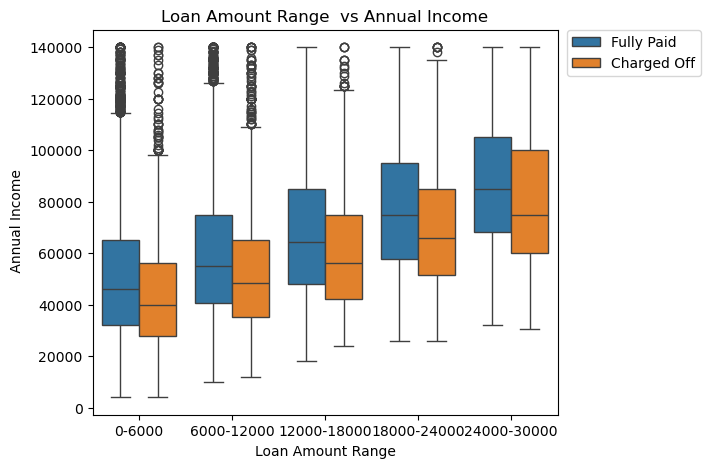

In [98]:
boxplotWithHue(loans,'loan_amnt_bin','annual_inc','Loan Amount Range  vs Annual Income' ,'Loan Amount Range',' Annual Income')

### Multivariate analysis on Quantitative variables

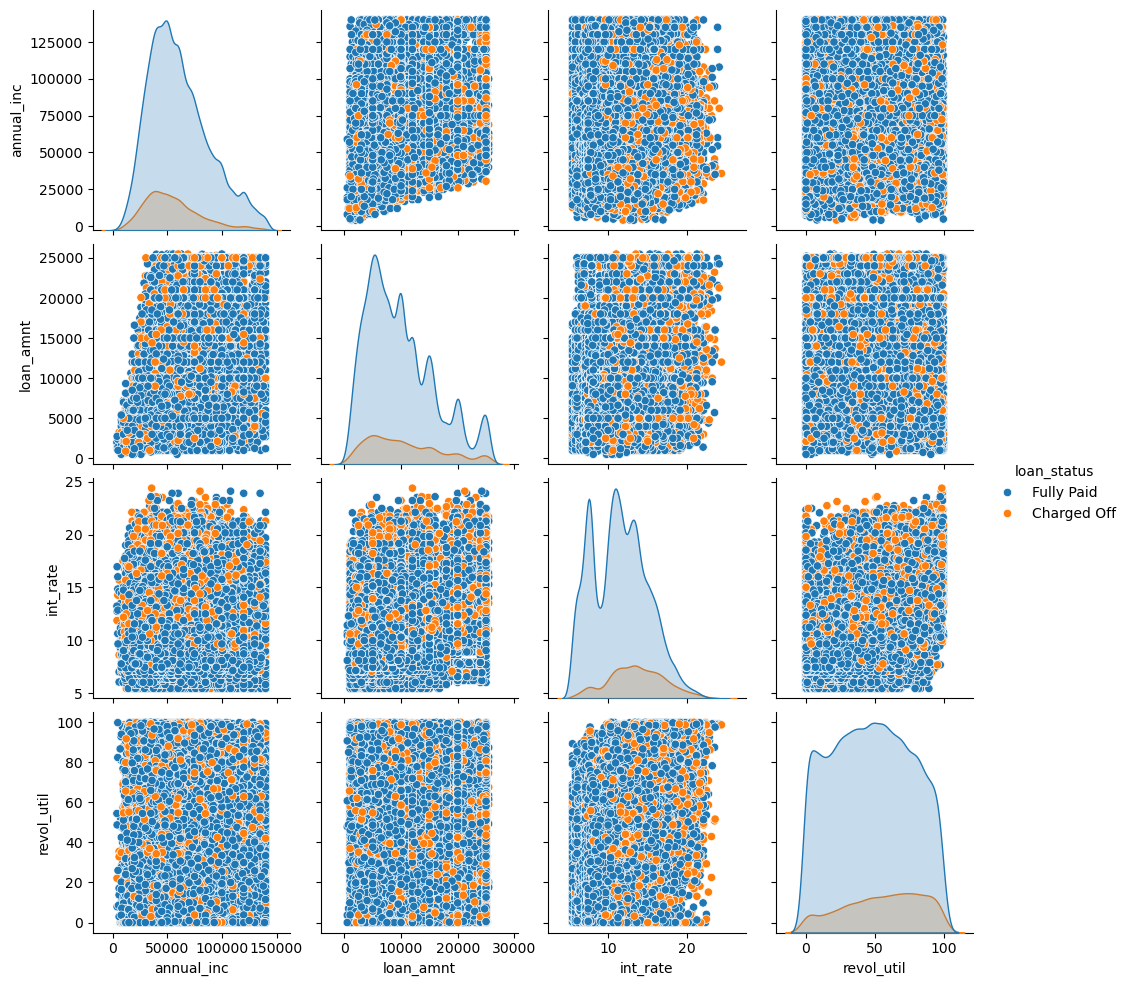

In [100]:
sns.pairplot(loans[['annual_inc','loan_amnt','int_rate','revol_util','loan_status']],hue='loan_status')
plt.show()

### Below analysis is done considering criteria which has more than 1/3rd of defaulters as risky

[]

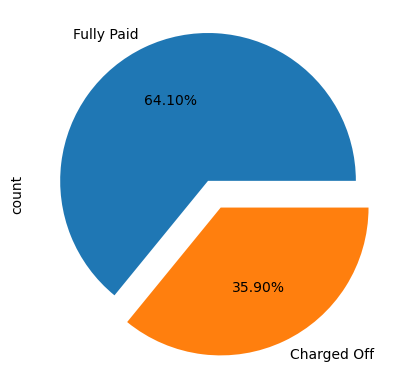

In [102]:
## Small business has highest percent of Charged Off. Multi variate analysis and the bivariate analysis on the insterest shows that interest rate with 
## value >=15% the Charged off are higher. Given this scenario as bi variate analysis is done on purpose with small business and interest rate >=15%
loans[(loans.int_rate >= 15) & (loans.purpose=='small_business')].loan_status.value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.2f%%')
plt.plot()

[]

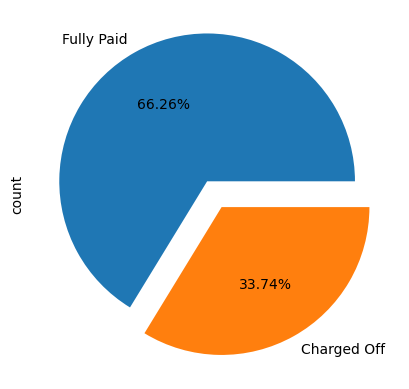

In [103]:
## Any loan whose interest rate is >=18% 
loans[(loans.int_rate >= 18)].loan_status.value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.2f%%')
plt.plot()

[]

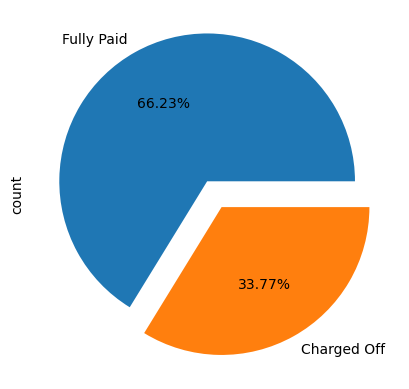

In [104]:
## Any loan whose interest rate is >=17%  and annual income <=90k
loans[(loans.annual_inc <= 90000) & (loans.int_rate>=17)].loan_status.value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.2f%%')
plt.plot()

[]

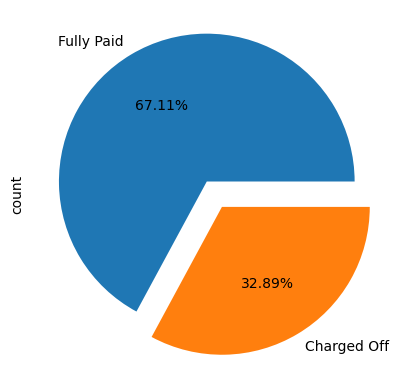

In [105]:
## Any loan whose applicant category is F/G
loans[loans.grade.isin(['F','G'])].loan_status.value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.2f%%')
plt.plot()

### Conlusion is arrived considering any criteria which has more than 1/3rd of defaulters
#### * Any loan with interest rate above 18%  has more chances of defaulting
#### * Applicants with grades F,G has more chances of defaulting
#### * Applicants with loan purpose small business and interest rate greater than 15% has more chances of defaulting
#### * Applicants with Annual income <= 90k and Interest >= 17% has more chances of defaulting